Considere el la siguiente ecuación diferencial. 


\begin{align*}
\mathrm{d}X_{t} & =\alpha X_{t}\left[1-\left(\dfrac{X_{t}}{K}\right)^{m}\right]\mathrm{d}t+\sigma X_{t}\mathrm{d}B_{t},t>t_{0}\\
X_{t_{0}} & =x_{0},
\end{align*}
dinde $x_{0}\left(\omega\right)$ es una variable aleatoria absolutamente
continua acotada $x_{0}:\Omega\to\left[a_{1},a_{2}\right]\subset\left(0,1\right)$.
Asumamos que $B_{t}$ es el movimiento browniano estandar y $x_{0}$
estan definidas en un espacio de probabilidad $\left(\mathcal{P},\Omega,\mathcal{F}\right)$. 

Pretendemos resolver la ecuación diferencial. 



In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Condicion inicial. 

x_0 = np.random.uniform()

# Parametros
alpha = 0.1
m = 5
max_pob = 400 # K
sigma = 2 ** (-2)

system_pars = [alpha, m, max_pob, sigma]

Ahora, considere las siguientes funciones auxiliares. 


\begin{align*}
u\left(t,X_{t}\right) & =\alpha X_{t}\left[1-\left(\dfrac{X_{t}}{K}\right)^{m}\right]\\
v\left(t,X_{t}\right) & =\sigma X_{t}
\end{align*}

Pudiendo reescribir el sistema. 

\begin{align*}
\mathrm{d}X_{t} & =u\left(t,X_{t}\right)\mathrm{d}t+v\left(t,X_{t}\right)\mathrm{d}B_{t},t>t_{0}\\
X_{t_{0}} & =x_{0},
\end{align*}


In [66]:
def u(t, x, pars):
    alpha = pars[0]
    m = pars[1]
    k = pars[2]
    y = alpha * x * k * (1 - (x / k) ** m)
    return y

def v(t, x, pars):
    sigma = pars[3]
    y = sigma * x
    return y


Ahora, conociendo la condición incial, mediante el método de Euler-Maruyama podemos calcular la trayectoria.


$$
X_{t_{i+1}}=X_{t_{i}}+u\left(t_{i},X_{t_{i}}\right)\Delta t_{i}+v\left(t_{i},X_{t_{i}}\right)\Delta W_{i},
$$

donde $\Delta t_{i}=t_{i+1}-t_{i},\Delta W_{i}=W_{i+1}-W_{i}$


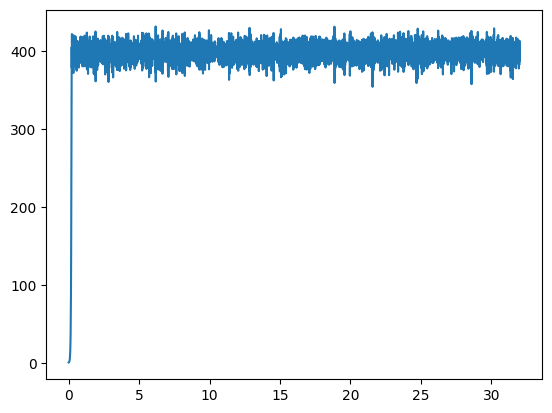

In [67]:
t = 32 # Tiempo Final, se asume Tiempo inicial igual a cero
n_p = 2 ** 12 # Numero de puntos

delta_t = t / (n_p - 1)

dw = np.sqrt(delta_t) * np.random.standard_normal(size = (n_p - 1))
x_t = [x_0]
for i in range(n_p - 1):
    xm1 = x_t[i] + u(1, x_t[i], system_pars) * delta_t + v(1, x_t[i], system_pars) * dw[i]
    x_t.append(xm1)

time = np.linspace(0, t, n_p)
plt.plot(time, x_t)
plt.show()

In [68]:
def solve_logistic(t, n):
    delta_t = t / (n - 1)
    dw = np.sqrt(delta_t) * np.random.standard_normal(size = (n - 1))
    x_t = [x_0]
    for i in range(n - 1):
        xm1 = x_t[i] + u(1, x_t[i], system_pars) * delta_t + v(1, x_t[i], system_pars) * dw[i]
        x_t.append(xm1)
    time = np.linspace(0, t, n)
    return time, x_t

In [69]:
n_samples = 1000

sols = []
for i in range(n_samples):
    time, x_t = solve_logistic(t, n_p)
    sols.append([time, x_t])

solution = pd.DataFrame(data = sols, columns = ['t_i','X(t_i)'])
solution.head()

,t_i,X(t_i)
0,"[0.0, 0.007814407814407814, 0.0156288156288156...","[0.2820345725713065, 0.3678574759062597, 0.480..."
1,"[0.0, 0.007814407814407814, 0.0156288156288156...","[0.2820345725713065, 0.37663896581631373, 0.50..."
2,"[0.0, 0.007814407814407814, 0.0156288156288156...","[0.2820345725713065, 0.36854513735622707, 0.48..."
3,"[0.0, 0.007814407814407814, 0.0156288156288156...","[0.2820345725713065, 0.37974587491968603, 0.51..."
4,"[0.0, 0.007814407814407814, 0.0156288156288156...","[0.2820345725713065, 0.3791106484697566, 0.499..."


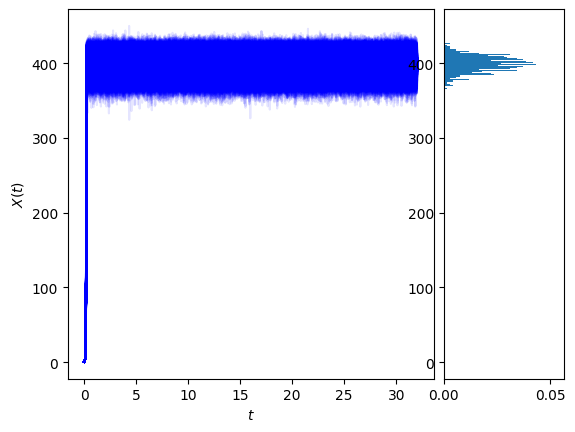

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os


fig, ax = plt.subplots()
marker_style_00 = dict(
    color="blue",
    linestyle="-",
    # marker="",
    markersize=1,
    markerfacecoloralt="gray",
    alpha=0.1,
)
x_T = []
for j in range(n_samples):
    ax.plot(solution.iloc[j, 0], solution.iloc[j, 1], **marker_style_00, label=r"$X(t_i)$")
    x_T.append(solution.iloc[j,1][-1])

plt.xlabel(r"$t$")
plt.ylabel(r"$X(t)$")

x_T = np.array(x_T)
ymax = np.max(np.abs(x_T))
binwidth = 0.025
lim = (int(ymax / binwidth) + 1) * binwidth
bins = 100  # np.arange(0, lim + binwidth, binwidth)
divider = make_axes_locatable(ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
n, bins, patches = ax_histy.hist(x_T, bins=bins, orientation="horizontal", density=True)
sigma = np.std(x_T)
mu = np.mean(x_T)
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(
    -0.5 * ((1.0 / sigma) * (bins - mu)) ** 2
)
# ax_histy.plot(y, bins, "--")
# plt.legend(loc=0)
plt.savefig("gen_log_sde_batch_sample_path.png", dpi=300)

plt.show()



In [81]:
g = grid = sns.JointGrid(x = solution.iloc[:,0].values_flatten(), y=solution.iloc[:,1])
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)
g.plot_marginals(sns.histplot)
g.ax_marg_x.remove()
# g = sns.jointplot(data=df_batch_path, x="t_i", y="X(t_i)", marginal_ticks=True)
# sns.kdeplot(df_batch_path["X(t_i)"], ax=g.ax_marg_x, legend=False)
g.savefig("marginal.png")
# plt.show()






AttributeError: 'Series' object has no attribute 'values_flatten'

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


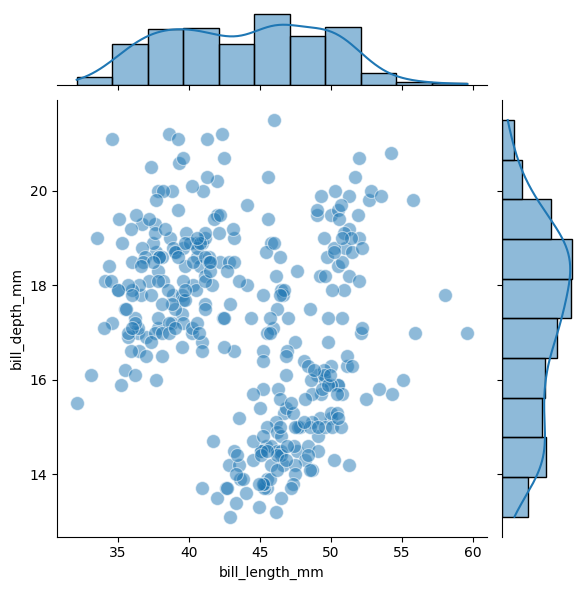

In [73]:
penguins = sns.load_dataset("penguins")
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

penguins

TypeError: JointGrid.plot() missing 1 required positional argument: 'marginal_func'

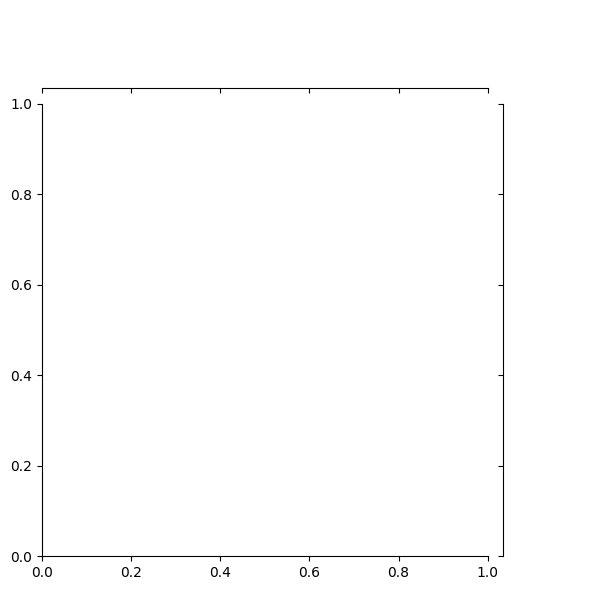

In [77]:
np.random.seed(42)
data = np.random.randn(100, 3)
columns = ['Variable1', 'Variable2', 'Variable3']
df = pd.DataFrame(data, columns=columns)


# Crear una matriz de gráficos utilizando sns.JointGrid
grid = sns.JointGrid(data=df, height=6)

# Gráficos de dispersión fuera de la diagonal principal
grid = grid.plot(sns.scatterplot, color='b')

# Histogramas en la diagonal principal
grid = grid.plot_marginals(sns.histplot, kde_kws={'color': 'k'})

# Mostrar la matriz de gráficos
plt.show()

TypeError: JointGrid.plot() missing 1 required positional argument: 'marginal_func'

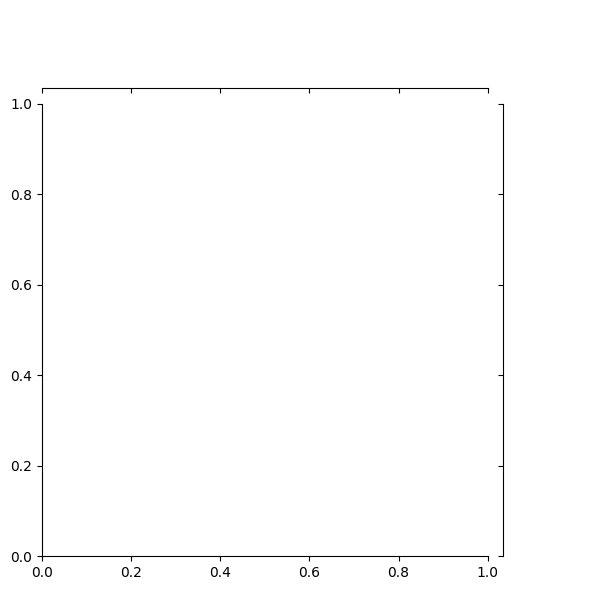

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Crear datos de ejemplo
np.random.seed(42)
data = np.random.randn(100, 3)
columns = ['Variable1', 'Variable2', 'Variable3']
df = pd.DataFrame(data, columns=columns)

# Crear una matriz de gráficos utilizando sns.JointGrid
grid = sns.JointGrid(data=df, height=6)

# Gráficos de dispersión fuera de la diagonal principal
grid = grid.plot(sns.scatterplot, color='b')

# Histogramas en la diagonal principal
grid.ax_marg_x.hist(df['Variable1'], color='k', alpha=0.5, bins=10)
grid.ax_marg_y.hist(df['Variable2'], color='k', alpha=0.5, bins=10, orientation='horizontal')

# Mostrar la matriz de gráficos
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

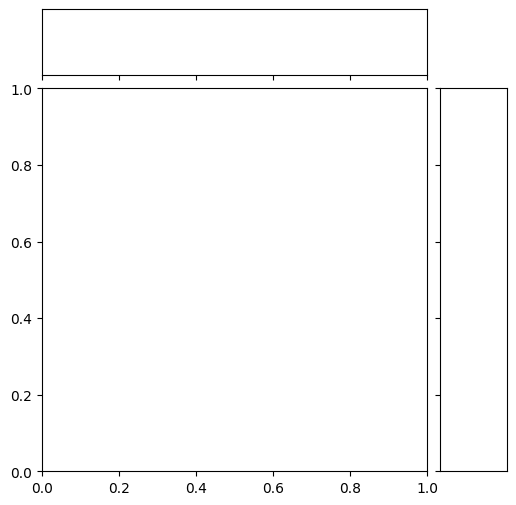

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que `solution` es un DataFrame con al menos 2 columnas
# solution = pd.DataFrame(...)  

# Crear una matriz de gráficos utilizando sns.JointGrid
g = sns.JointGrid(x=solution.iloc[:, 0].values.flatten(), y=solution.iloc[:, 1].values.flatten())

# Gráfico de dispersión en el espacio conjunto
g.plot_joint(sns.scatterplot)

# Histogramas y KDE en las marginales
g.plot_marginals(sns.histplot, color='blue', alpha=0.7, bins=20)
g.plot_marginals(sns.kdeplot, color='green')

# Eliminar uno de los histogramas (en este caso, el eje x)
g.ax_marg_x.remove()

# Guardar la figura
g.savefig("marginal.png")

# Mostrar la figura
plt.show()
